# Introduction/Problem Definition

  Predicting House Prices above certain limit.

### Dataset Selection
The dataset is taken from __[Kaggle](https://www.kaggle.com/skirmer/fun-with-real-estate-data/data )__  which belongs to the Housing Data.

### Classification Problem Definition

 Will the cost of house for the specifications set by the customer fall under 150000 or not?

###  Importing Necessary package for data explorations

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

##  Data Exploration

###  Loading of Realestate data in a dataframe

In [199]:
# load the data file for the realestate details.

df= pd.read_csv('Pridicting_house_Prices_1.csv')

In [198]:
#Analyzing records using head command
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ThresholdVerification,OUTPUT_LABEL
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,> Threshold,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,> Threshold,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,> Threshold,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,< Threshold,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,> Threshold,1


Let us have a quick overview of the data (columns, variable type and non-null values)

## Information about the dataset

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Numerical Descriptive Statistics

In [164]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Setting up of threshold

In [167]:
#This is the threshold which we are taking to predict the classification issue.
Threshold=150000

In [168]:
# We are creating another variable in which we will store the information that sales price is greater than 
#threshold or not
df['ThresholdVerification'] = (df['SalePrice']-Threshold).apply(lambda x: '> Threshold' if x >1 else '< Threshold')

Let us see how the Threshold variable looks.

In [169]:
df[list(df.columns)[80:91]].head()

,SalePrice,ThresholdVerification
0,208500,> Threshold
1,181500,> Threshold
2,223500,> Threshold
3,140000,< Threshold
4,250000,> Threshold


To be on a safe side if data may by any chance contain "?". We are replacing with my nan.

In [170]:
# replace ? with nan
df = df.replace('?',np.nan)

Printing number of Samples

In [171]:
#Printin Number of Samples
print('Number of samples:',len(df))

Number of samples: 1460


Printing Number of Columns

In [172]:
#Printing Number of Columns
print('Number of columns:',len(df.columns))

Number of columns: 82


Now let's define an output variable for our binary classification. Here we will assign the values to the output variable if the threshold limit exeeds the sale price we will assign 1 otherwise we will assign 0.

In [174]:
df['OUTPUT_LABEL'] = (df.ThresholdVerification == '> Threshold').astype('int')

Getting the list of Unique values for every data column. If the number of unique values are less than 20 then we need to print values otherwise we will be printing unique values

In [175]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 20, print the values. Otherwise print the number of unique values
    if len(n)<20:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Id: 1460 unique values
MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage: 111 unique values
LotArea: 1073 unique values
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood: 25 unique values
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual
[ 7  6  8  5  9  4 10  3  1  2]
OverallCond
[5 8 6 7 4 2 3 9 1]
YearBuilt: 112 unique values
YearRemodAdd: 61 unique values
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran

# Feature Engineering

In this section, we will create the features of our housing prices predictive model. We will also add new variables to data frame using categorical features and will keep track of all the columns of the data frame.

## Numerical Features

The easiest type of features which do not require any modifications and the values that contain are numerical values are numerical features.
#### Storing of numerical features

In [176]:
cols_num = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
            'MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
            'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageArea','WoodDeckSF',
            'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'
            
           ]

Let's see if there is any missing value in the columns.

In [177]:
df[cols_num].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Let us fill the missing values with the mean of the missing value.

In [95]:
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace=True)
df['MasVnrArea'].fillna((df['MasVnrArea'].mean()), inplace=True)
df['GarageYrBlt'].fillna((df['GarageYrBlt'].mean()), inplace=True)

Let's cross-check if there are any other missing values in the numerical data

In [96]:
df[cols_num].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

Lets see how our numercal variable look like.

In [97]:
df[cols_num].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,1145,...,836,192,84,0,0,0,0,0,12,2008


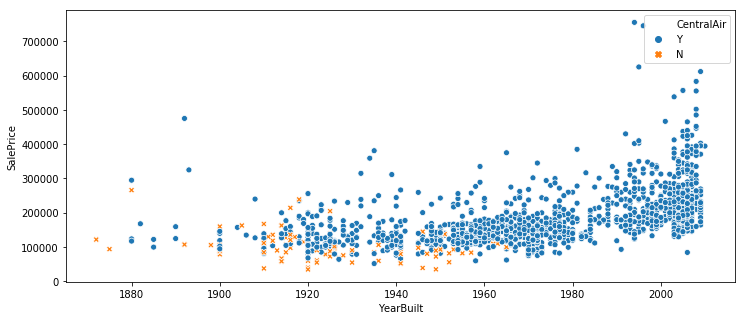

In [98]:
#Scatterplot showing sales price versus Year Built with or without central Air Conditioning.

plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="YearBuilt", y="SalePrice",hue='CentralAir',style='CentralAir', data=df)
plt.show()

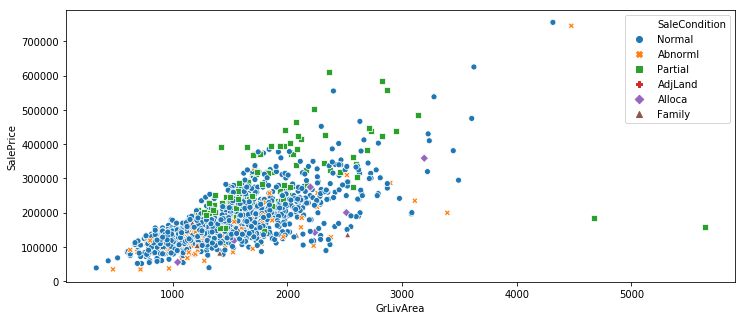

In [99]:
#Scatterplot showing sales price versus ground living area.
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="GrLivArea", y="SalePrice",hue='SaleCondition',style='SaleCondition', data=df)
plt.show()

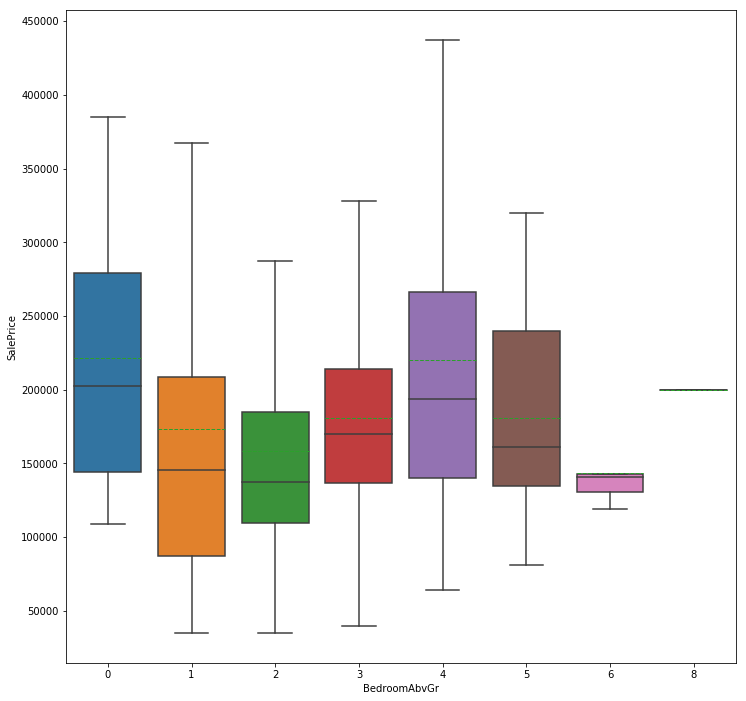

In [100]:
#Scatterplot showing sales price versus Average Bedroom above ground level.
plt.figure(figsize=(12,12))
ax1=sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=df,showmeans=True, meanline=True,sym='')

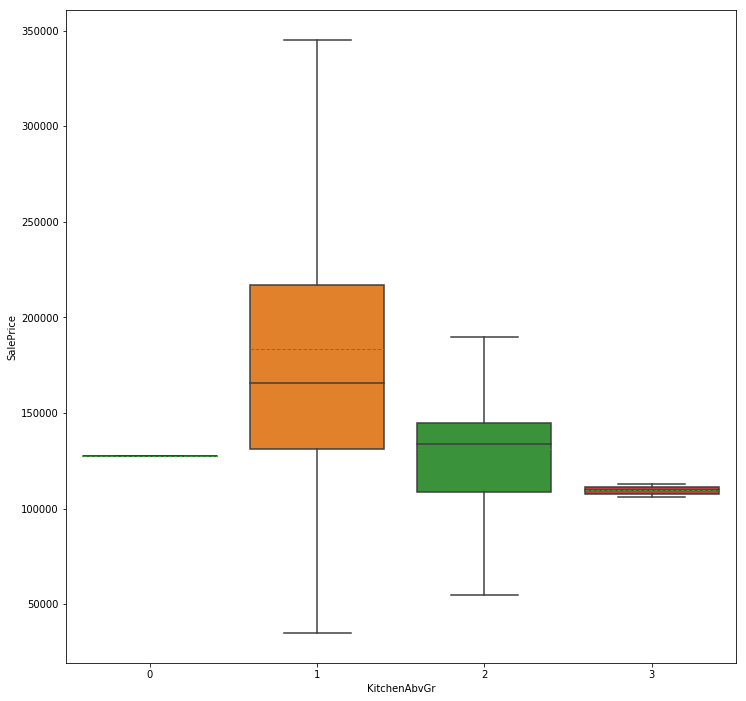

In [101]:
#Scatterplot showing sales price versus number of kitchens above ground level.
plt.figure(figsize=(12,12))
ax2=sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=df,showmeans=True,meanline=True,sym='')

Text(0.5,0,'SaleCondition')

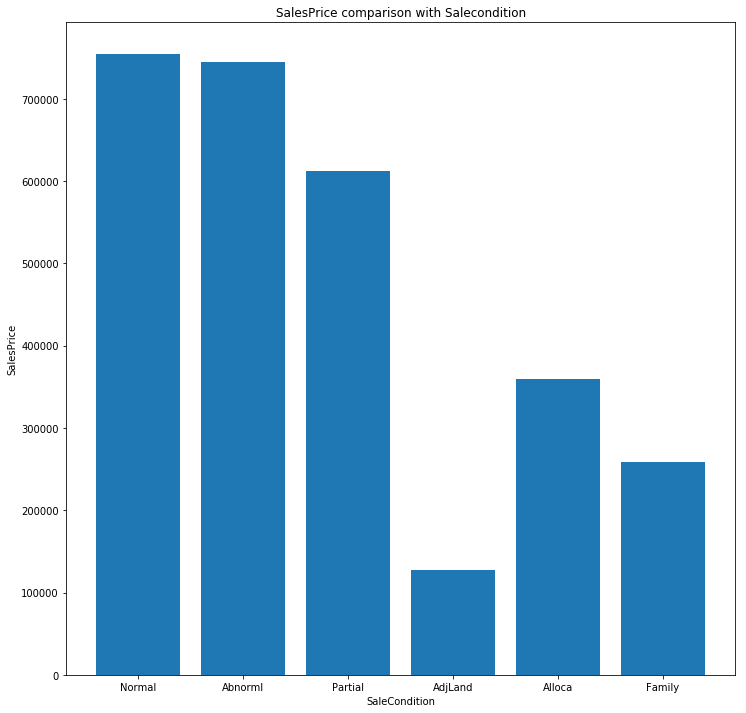

In [102]:
#Sales price comparison with sales condition
plt.figure(figsize=(12,12))
plt.bar(df['SaleCondition'],df['SalePrice'], 0.8)

plt.title('SalesPrice comparison with Salecondition')
plt.ylabel('SalesPrice')
plt.xlabel('SaleCondition')

## Categorical Features

The next type of features we want to create are categorical variables.

The first set of categorical data we will deal with are these columns:

In [103]:
#Storing of Categorical variables
cols_cat =['CentralAir','SaleCondition']

Let's check if there are any missing data

In [104]:
#Checking of missing data
df[cols_cat].isnull().sum()

CentralAir       0
SaleCondition    0
dtype: int64

Lets check our Catagorical Variables

In [105]:
df[cols_cat].head()

,CentralAir,SaleCondition
0,Y,Normal
1,Y,Normal
2,Y,Normal
3,Y,Abnorml
4,Y,Normal


### One-Hot Encoding Scheme

Definition and Description of panda get dummies Function

    In one-hot encoding technique, we create unique columns for each of the distinct categorical values for that column. For example, for the column Day of week, we would create new columns as 'DayOfWeek_Monday, 'DayOfWeek_Tuesday’ etc. If  the Day of Week is Monday, the day of week gets 1 under ‘DayOfWeek_Monday’ and 0 under rest of the Day of Week Tuesday, so on.
    To create one-hot encoding for a column, we will use the pd.get_dummies function. Prefix is used in the syntax so that the dataset can be reverted to original state with all the basic columns if required.
    
    pd.get_dummies function in Python which converts categorical variables into dummy or indicator variables. Let us create new columns for the variable "SaleCondition".


In [106]:
pd.get_dummies(df['SaleCondition'],prefix = 'SaleCondition').head()

,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


To remove corelation we will reove first column of categorical variable.

In [107]:
pd.get_dummies(df['SaleCondition'],prefix = 'SaleCondition', drop_first = True).head()

,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


It becomes a troublesome work if we want to have get_dummies for each of the categorical columns. We have an option to send all columns at once into get_dummies and the column name as a prefix.

In [108]:
pd.get_dummies(df[cols_cat],drop_first = True).head()

,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,1,0


Now we are ready to make all of our categorical features and store it in df_cat.

In [109]:
df_cat = pd.get_dummies(df[cols_cat], drop_first = True)

Now we will concatenate our categorical data  with original axis  is 1 represents horizontal concatenation

In [110]:
df = pd.concat([df,df_cat], axis = 1)

Let us see our df

In [111]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,ThresholdVerification,OUTPUT_LABEL,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Normal,208500,> Threshold,1,1,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Normal,181500,> Threshold,1,1,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Normal,223500,> Threshold,1,1,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Abnorml,140000,< Threshold,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Normal,250000,> Threshold,1,1,0,0,0,1,0


We will Store the list of all columns categorical variables contained in df_cat to Cols_all_Cat

In [112]:
cols_all_cat = list(df_cat.columns)

Lets analyze how our categorical variables look like.

In [113]:
df[cols_all_cat].head()

,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,1,0


## Engineering Features Summary

Let us get the summary of features for numerical and categorical variables

In [114]:
print('Total number of features:', len(cols_num)+len(cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 38
Numerical Features: 32
Categorical Features: 6


Let's have a new data frame which has columns of interest Numerical variables.

In [115]:
df[cols_num].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,1145,...,836,192,84,0,0,0,0,0,12,2008


Lets check our Categorical data

In [116]:
df[cols_all_cat].head()

,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,0,0,0
4,1,0,0,0,1,0


Let us combine all the engineered features

In [117]:
#we are combining all featured numerical,categorical as well as output variable
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]
df_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,MiscVal,MoSold,YrSold,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OUTPUT_LABEL
0,60,65.0,8450,7,5,2003,2003,196.0,706,856,...,0,2,2008,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,1262,...,0,5,2007,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,920,...,0,9,2008,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,756,...,0,2,2006,1,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,1145,...,0,12,2008,1,0,0,0,1,0,1


## Building Training/Validation/Test Samples

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

    -Training Samples: In supervised learning, these are the samples which contains the output
         variables or the outcomes to train the machine learning model.
    -Validation Samples: These samples are used to make decisions on how to find and optimize the best
          suited model for a given problem and the intention is to improve the model.
    -Test Samples: These are used to measure the performance of the model on unseen data.

  
We will be using samples as 70% training data,15% validation and rest as test data

We are shuffling the samples with the random state 42(It is same as seed function in R which is used to produce same random results) to reduce bias. This is done so that to avoid the samples of same type getting accumulated. For example, training data containing all positive cases. To reduce this, we use sample function below.

In [118]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

Here we are extracting 30 per cent of data in  a data frame containing both validation and test data using sample function.

In [119]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


Now we will split the data frame containing validation and test data and store it into the respective data frames. We are splitting in such a way that half of the records go to the training dataset and rest to the test. Note at last both the dataset will contain 15 percent of the total observations.

In [120]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

 `.drop`  drops the rows of the set. We will get the records in the training dataset from the entire dataset excluding those records which are in the validation and test set.

In [121]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [122]:
df_train_all.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,...,MiscVal,MoSold,YrSold,CentralAir_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OUTPUT_LABEL
0,20,70.0,8414,6,8,1963,2003,0.0,663,1059,...,0,2,2006,1,0,0,0,1,0,1
1,60,98.0,12256,8,5,1994,1995,362.0,1032,1463,...,0,4,2010,1,0,0,0,1,0,1
2,30,56.0,8960,5,6,1927,1950,0.0,0,1008,...,0,3,2010,1,0,0,0,1,0,0
3,50,50.0,5000,6,7,1947,1950,0.0,399,1004,...,0,10,2006,1,0,0,0,1,0,1
4,20,89.0,12898,9,5,2007,2008,70.0,1022,1620,...,0,9,2009,1,0,0,0,1,0,1


At this point, let's check what percent of the valus are greater than 1500000. This is known as prevalence.  

In [123]:
#This is defined for calculating Prevalance.
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [124]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 219):0.612
Valid prevalence(n = 219):0.580
Train all prevalence(n = 1022):0.568


The prevalence is about the same for each group.But this is interesting that we have more positive cases then negative 

Let's verify that we used all the data.

In [125]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 1460)


Let’s save all our work of Splitting in separate files in our folder. Here, index =false just drops index values from the csv.

In [126]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

# Data Preparation

    Importing matplot library package
     matplotlib is a plotting library for the Python programming language and its numerical mathematics extension of NumPy

In [127]:
import matplotlib.pyplot as plt

We will load training and validation dataset. 
    
      Note:-Tests set will not be loaded until models are tuned.

In [128]:
#Reading training and validation data
df_train_all = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')

In [129]:
#Printing of Training and Validation Prevalences.
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Valid prevalence(n = 219):0.580
Train all prevalence(n = 1022):0.568


Now we will split the training data  and make it balanced

    The goal of below is to split the training data to positive and negative and then make the training data balanced as an equal number of positive and negative cases.

In [130]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data(In our dataset we have more positives then negatives So we have concatenated with 
#respect to negative test cases 
df_train = pd.concat([df_train_neg, df_train_pos.sample(n = len(df_train_neg), random_state = 42)],axis = 0)

# shuffle the order of training samples we have a random state of 42 however we can also change the state value
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

col2use = [c for c in list(df_train_all.columns) if c != 'OUTPUT_LABEL']
print('Number of columns to use:', len(col2use))

Train balanced prevalence(n = 884):0.500
Number of columns to use: 38


Now we will find mean for all the columns and will store in df_mean.csv. After storing we will read all the means and then will print to see the output. The main purpose of doing this is some of our machine learning algorithms such as logistic regression does not support null or missing values. So, we will be adding the mean values in missing values.

In [131]:
df_train.to_csv('df_train.csv',index=False)

In [132]:
# Calculating the means
df_mean = df_train[col2use].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [133]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,MSSubClass,55.429864
1,LotFrontage,68.912097
2,LotArea,10318.384615
3,OverallQual,5.955882
4,OverallCond,5.606335


We have defined the function which will fill the missing values for all the columns. This function will be used for training and validation datasets as depicted below.

In [134]:
def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [135]:
#Filling missing values
df_train_all = fill_my_missing(df_train_all, df_mean_in)
df_train = fill_my_missing(df_train, df_mean_in)
df_valid = fill_my_missing(df_valid, df_mean_in)

Most machine learning packages like to use an input matrix X and output vector y, so let's create those:

In [136]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (1022, 38)
Training shapes: (884, 38) (884,)
Validation shapes: (219, 38) (219,)


As we can see we have the variables of different sizes. But most of our machine learning algorithms have the trouble when there are different sized variables. To resolve this, we usually scale data. We can use a standard or balanced scaler, but we are using a standard scaler. This removes the mean and scales it to variance. We will use the scaler using training data. This process is also called  data normalization.


In [137]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

Again, we will need this scaler for the test data, so let's save it using a package called `pickle`. 

In [138]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

Load it back:

In [139]:
scaler = pickle.load(open(scalerfile, 'rb'))

Most of the machine learning algorithms use the transformed matrices. Let’s transform the matrices.

In [140]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection

## Tour of machine learning algorithms in sklearn

We will now explore a few different machine learning algorithms.Lets use the default parameters.

In [141]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

We have defined Specificity function which returns the specificity values based in threshold which we have taken as 0.5 and input parameters. Report function will calculate AUC, accuracy, recall, precision, specificity, prevalence.

For this analysis, let's set our threshold at 0.5.

In [142]:
thresh = 0.5

## Logistic regression

    This is the standard logistic regression model.
    This is a type model which can be understood very easily and possess a linear decision boundary. Features can be interpretable .There are also set of rules associated with it which needs to follow. Such as data must be normalized, cannot handle missing values. need matrix as well as its transformations which causes run time to increase.

In [143]:
# logistic regression
#Sklearn provides numerous functions for Logitic regression.We just need to import Logistic Regression package
#We will use the ramdom state same as previous and fit our X trasformed training metrics with y training.
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.983
accuracy:0.930
recall:0.921
precision:0.938
specificity:0.939
prevalence:0.500
 
Validation:
AUC:0.974
accuracy:0.918
recall:0.898
precision:0.958
specificity:0.946
prevalence:0.580
 


## Decision Tree Classifier

    This type of model is actually complex but really simple to understand.Moreover there are no assumptions regarding the structure of data.The main problem with this type of model is that it can memorize training data and overfits easily


In [145]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [146]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.999
accuracy:0.990
recall:0.982
precision:0.998
specificity:0.998
prevalence:0.500
 
Validation:
AUC:0.851
accuracy:0.836
recall:0.811
precision:0.896
specificity:0.870
prevalence:0.580
 


## Random Forest

    Random forest is an extension of decision trees and it is the bunch of corelated trees.It works better than decision trees in most of cases.

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [148]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.995
accuracy:0.958
recall:0.941
precision:0.974
specificity:0.975
prevalence:0.500
 
Validation:
AUC:0.960
accuracy:0.904
recall:0.882
precision:0.949
specificity:0.935
prevalence:0.580
 


# Feature Importance

    Another strategy for model improvement is to understand what the important features of a model are and what are not, this is possible using models like logistic Regression and random forests. If we add new features it will help us with the treatment of high bias and high variance. We will obtain the top list of features for treating variance.

## logistic regression

    Logistic regression is a very interpretable model because the coefficient for each variable shows how important that variable is for the prediction. Note that you need to have normalized the data so the coefficients are comparable between variables. 

In [149]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can extract the coefficients using `coef_` and store in a new dataframe (sorted by importance) 

In [150]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [151]:
feature_importances.head()

,importance
OverallQual,1.732459
YearBuilt,0.935801
GrLivArea,0.880160
TotalBsmtSF,0.812820
LotArea,0.763011


For logistic regression, the variables with highest positive coefficients are predictive of exeding the amount while the variables of negative represent non-exceeding.

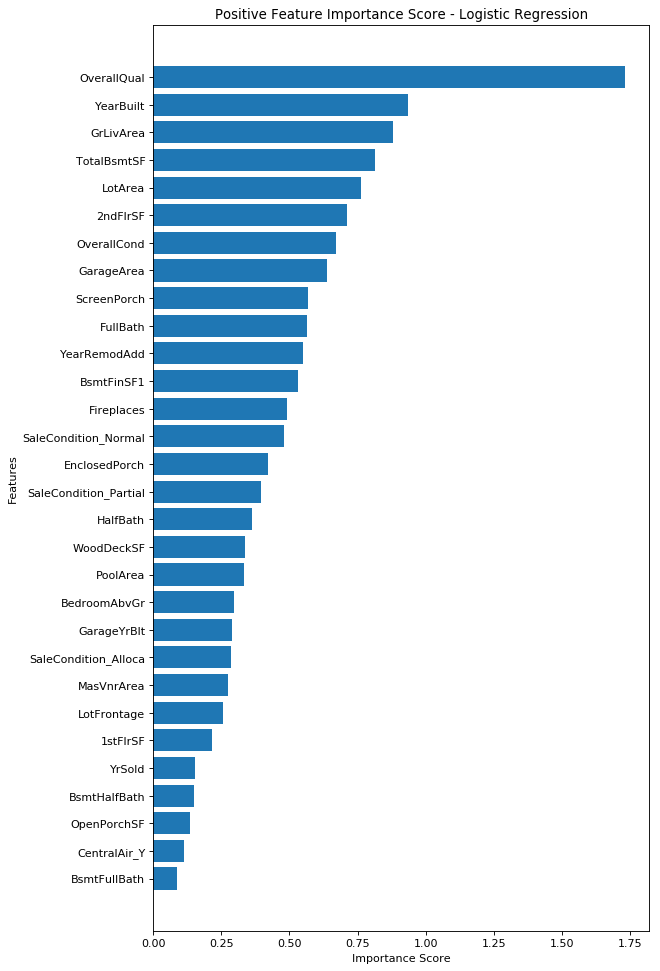

In [152]:
num = 30
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

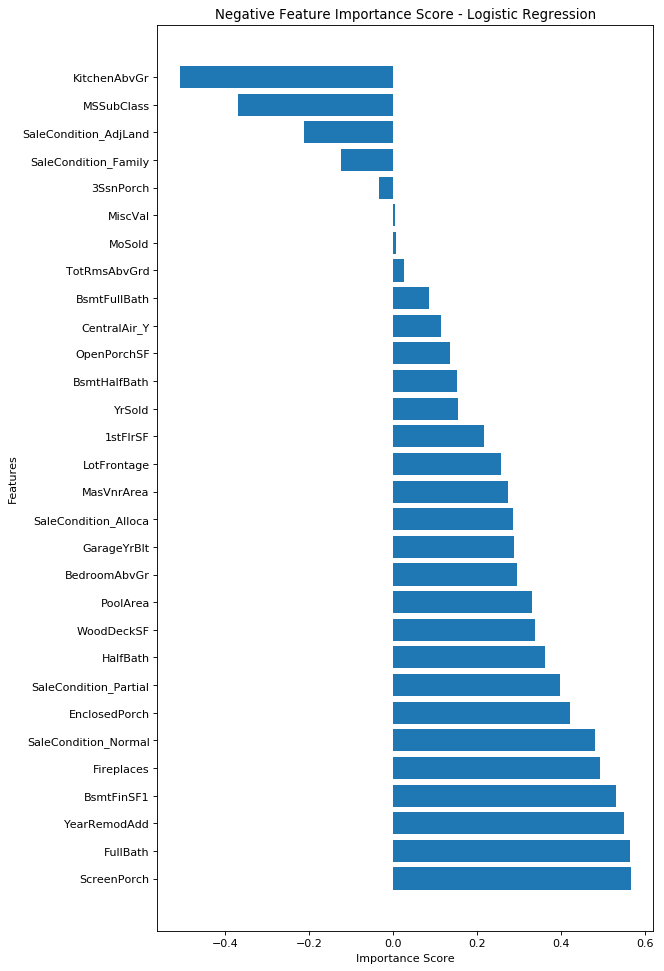

In [153]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

## Random forest

    There is another way of highlighting feature importance in which the feature importance depicts how often particular feature was used to split the data. This makes a feature importance in decision making. 

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [155]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [156]:
feature_importances.head()

,importance
GrLivArea,0.140914
YearBuilt,0.121422
OverallQual,0.119025
GarageArea,0.092822
Fireplaces,0.080713


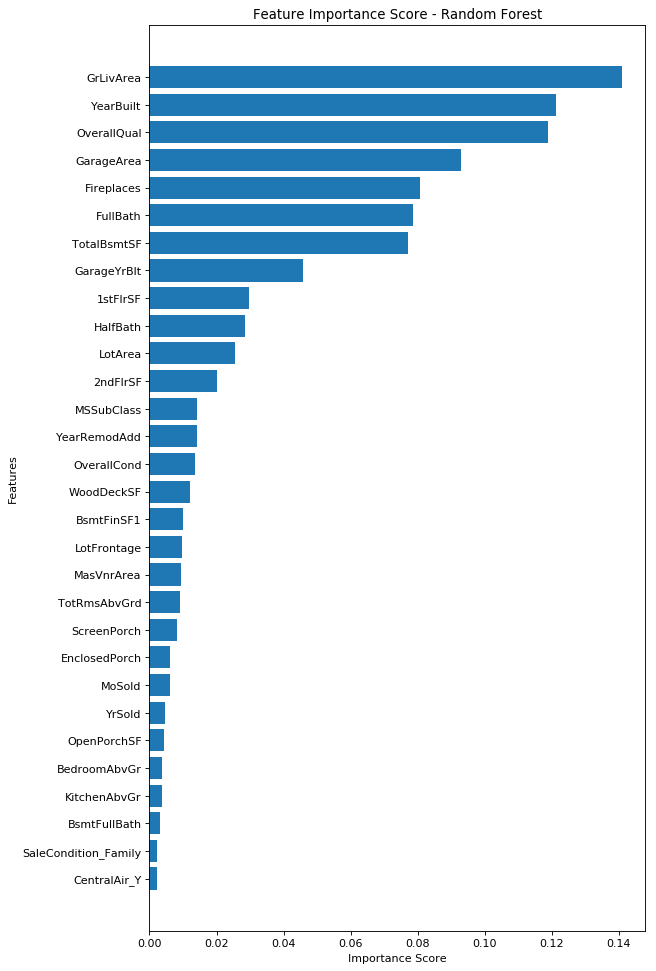

In [157]:
num = 30
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()